<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Logistic Regression: Banking Marketing Campaign</h1>

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>
<p style="color: pink">
The Portuguese bank XYZ is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up. To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.
</p>

In [11]:
import pandas as pd

# Define the file paths for the data 
path = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Projects/logistic-regression-project/data/raw/data.csv', sep=';')
total_data = pd.DataFrame(path)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Exploration and data cleaning</h3>
<p style="color: pink">
We will conduct a concise Exploratory Data Analysis (EDA), focusing on essential aspects without delving into intricate details. 
</p>

In [12]:
# get the shape of df
total_data.shape

(41188, 21)

In [13]:
# get the info of df
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<ul style="color: pink">
    <li>We have 10 numerical characteristics and 11 categorical characteristics among which we find the target or class to predict.</li>
    <li>The numerical characteristics are: <em>age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed</em></li>
    <li>The categorical characteristics are: <em>job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome</em</li>
</ul>

In [14]:
# Check if there are duplicates 
total_data = total_data.drop_duplicates().reset_index(drop=True)
total_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
# Check if there are missing values
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
# Eliminate irrelevant columns: 'contact', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'month'
total_data = total_data.drop(['contact', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'month'], axis=1)
total_data.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h3 id="step3" style="font-family: Comic Sans MS; color: #68FF33">3. Analysis of univariate variables</h3>
<strong><span style="color: red">Analysis of categorical variables</span></strong>

C:\Users\Jorge Payà\AppData\Local\Temp\ipykernel_10088\3563609852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(total_data['job'], palette='viridis')


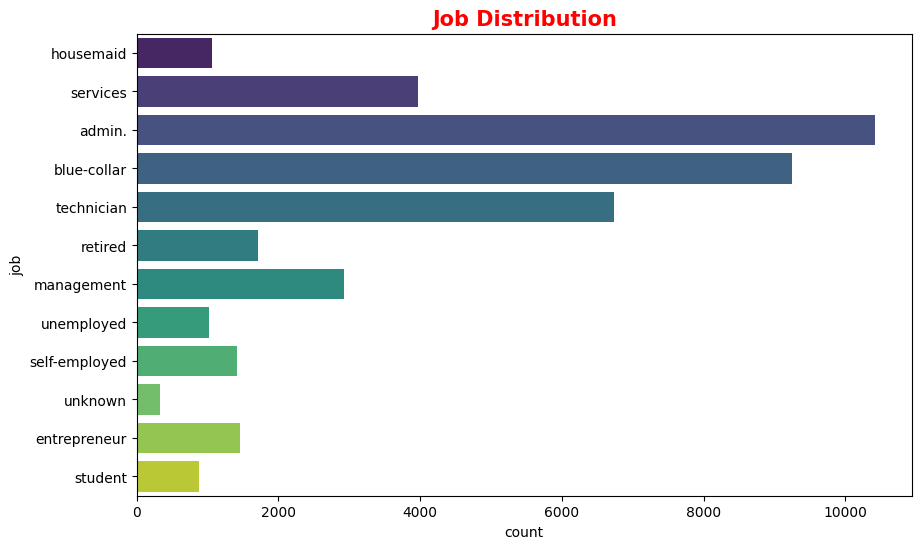

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the job column
plt.figure(figsize=(10, 6))
sns.countplot(total_data['job'], palette='viridis')
plt.title('Job Distribution', color='r', fontweight='bold', fontsize=15)
plt.show()

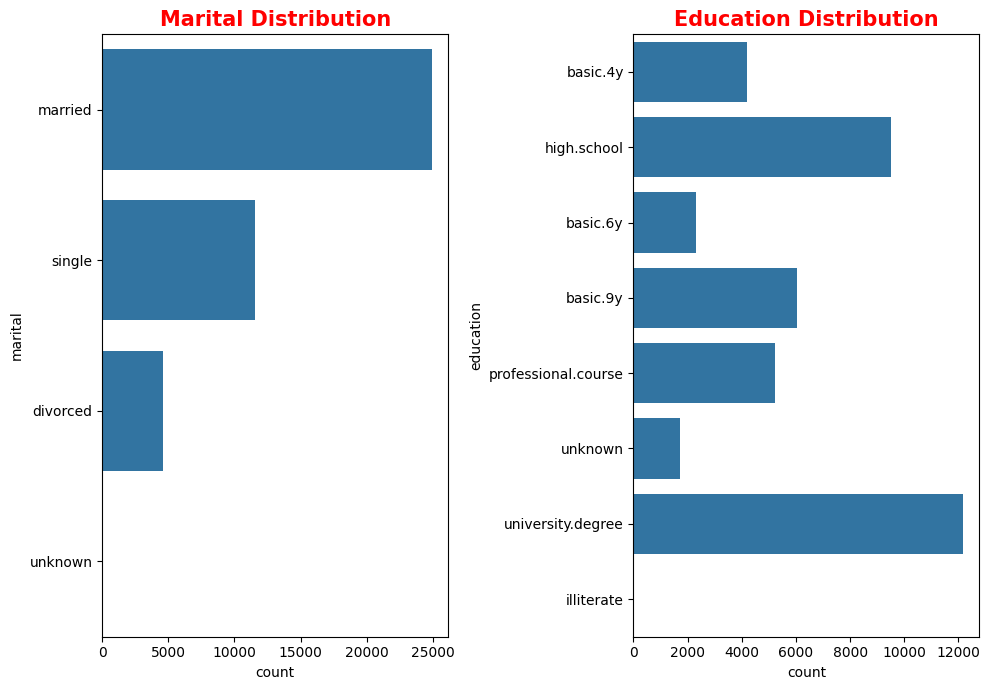

In [38]:
# Subplots for distribution of the marital and education columns
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(total_data['marital'], ax=ax[0])
ax[0].set_title('Marital Distribution', color='r', fontweight='bold', fontsize=15)
sns.countplot(total_data['education'], ax=ax[1])
ax[1].set_title('Education Distribution', color='r', fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()

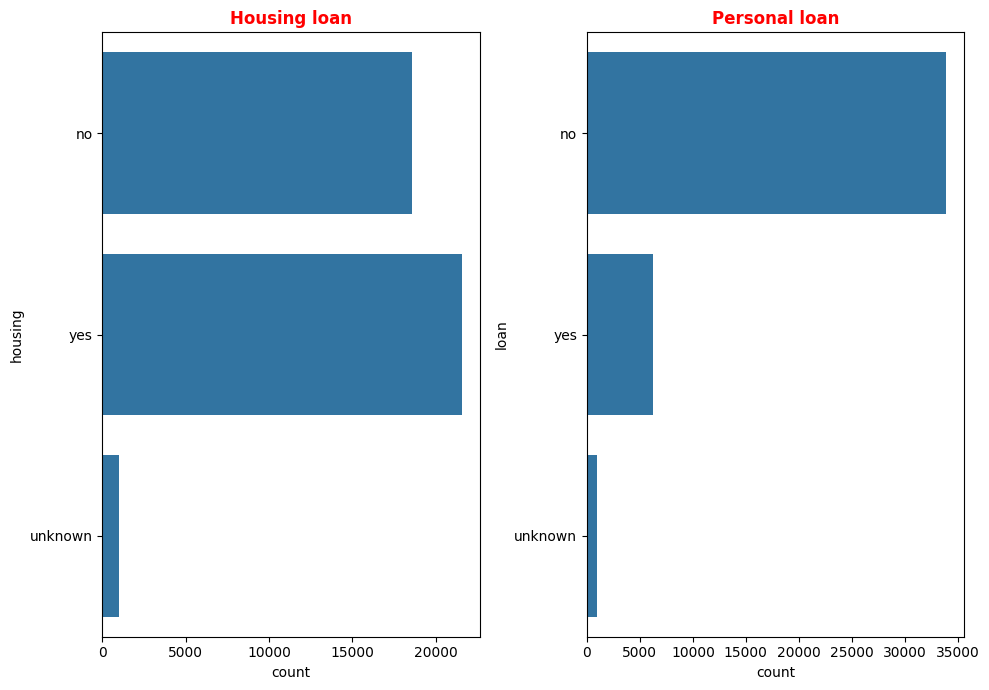

In [47]:
# Plot the distribution of the default, housing and loan columns
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(total_data['housing'], ax=ax[0])
ax[0].set_title('Housing loan', color='r', fontweight='bold', fontsize=12)
sns.countplot(total_data['loan'], ax=ax[1])
ax[1].set_title('Personal loan', color='r', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

<strong><span style="color: red">Correlation Analysis</span></strong>

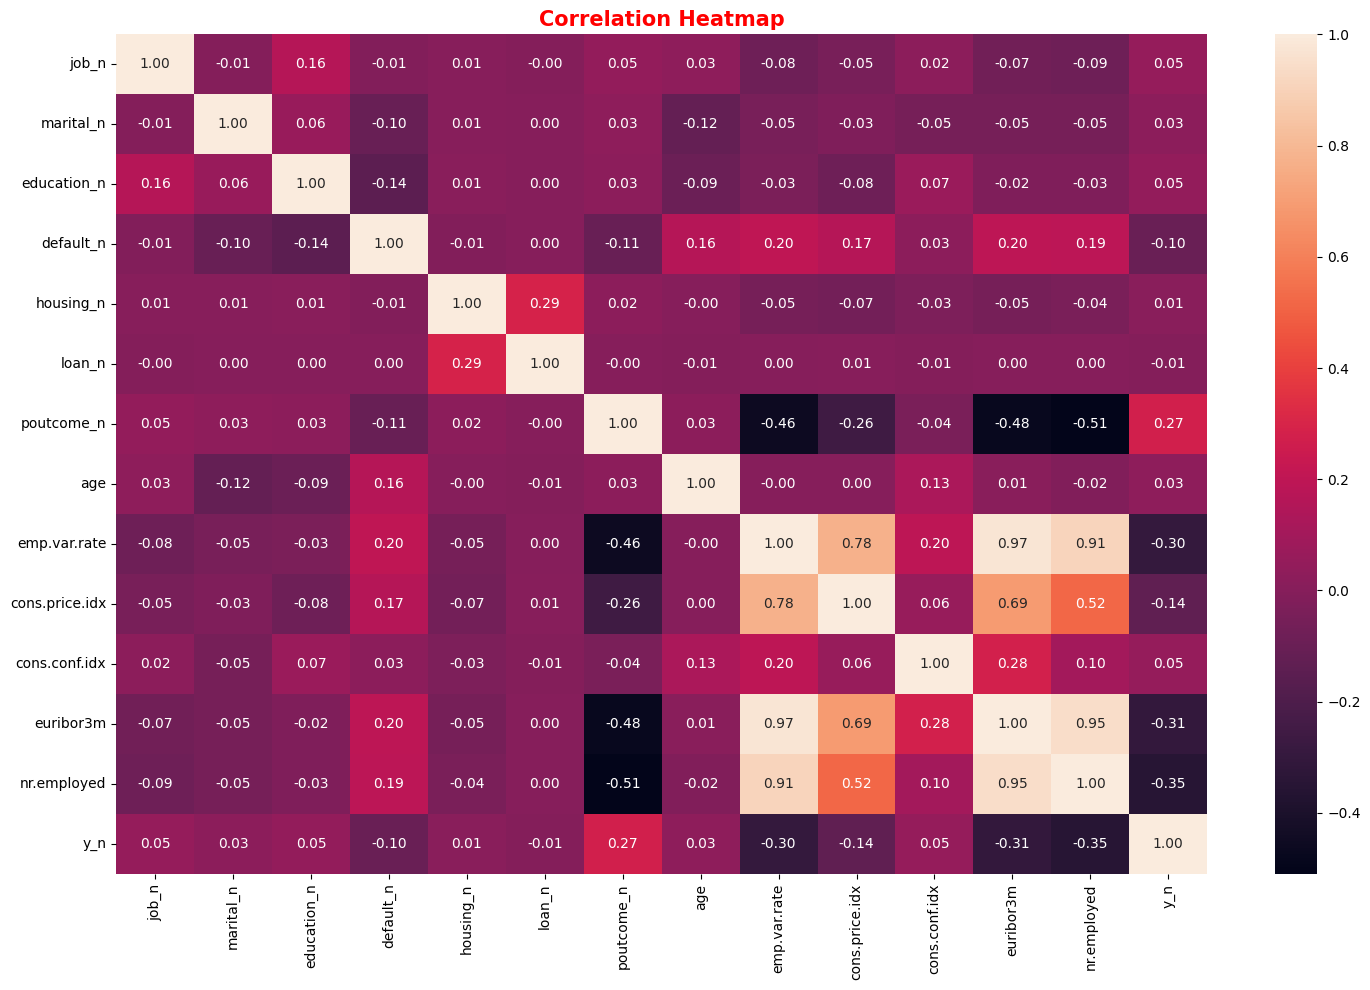

In [49]:
# Fatorize the categorical columns 
total_data['job_n'] = pd.factorize(total_data['job'])[0]
total_data['marital_n'] = pd.factorize(total_data['marital'])[0]
total_data['education_n'] = pd.factorize(total_data['education'])[0]
total_data['default_n'] = pd.factorize(total_data['default'])[0]
total_data['housing_n'] = pd.factorize(total_data['housing'])[0]
total_data['loan_n'] = pd.factorize(total_data['loan'])[0]
total_data['poutcome_n'] = pd.factorize(total_data['poutcome'])[0]
total_data['y_n'] = pd.factorize(total_data['y'])[0]
num_variables = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'poutcome_n', 'age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_n']

fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(total_data[num_variables].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap', color='r', fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()

<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">4. Feature engineering</h3>
<strong><span style="color: red">Min-Max scaler</span></strong>

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index=total_data.index, columns=num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.481481,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.493827,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.246914,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.283951,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.481481,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


<strong><span style="color: red">Feature selection</span></strong>

In [53]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

X = total_data_scal.drop('y_n', axis=1)
y = total_data_scal['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Select the best features
selection_model = SelectKBest(score_func=chi2, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,default_n,poutcome_n,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980730,1.000000
1,0.0,0.0,0.333333,0.138291,0.512287
2,0.0,0.0,0.937500,0.956926,0.859735
3,0.0,0.0,0.937500,0.957379,0.859735
4,0.0,0.0,0.333333,0.175924,0.512287


In [54]:
X_test_sel.head()

,default_n,poutcome_n,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.104167,0.143278,0.425709
1,0.0,0.5,0.333333,0.150759,0.512287
2,0.0,0.0,0.479167,0.073679,0.000000
3,0.0,0.5,0.333333,0.150759,0.512287
4,0.0,0.0,1.000000,0.981410,1.000000


In [ ]:
X_train_sel['y_n'] = list(y_train)
X_test_sel['y_n'] = list(y_test)

<ul style="color: pink">
    <li>We add a new column named <em>'y_n'</em> to the <strong>X_train_sel</strong> and <strong>X_test_sel</strong> DataFrames. The values for this new column are taken from <strong>y_train</strong> and <strong>y_test</strong> respectively.</li>
    <li>The list() function is used to convert <strong>y_train</strong> and <strong>y_test</strong> into a list. This is necessary because when adding a new column to a DataFrame, the values need to be in a list-like structure (a list, a Series, an array, etc.).</li>
    <li>In the context of a typical machine learning project, y_train and y_test usually contain the target values (the values we want to predict) for the training and test datasets respectively.</li>
</ul>

In [ ]:
X_train_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Projects/logistic-regression-project/data/processed/clean_train.csv', index=False)
X_test_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Projects/logistic-regression-project/data/processed/clean_test.csv', index=False)